STOCK MARKET PREDICTION

In [1]:
from google.colab import files
uploaded = files.upload()

Saving infolimpioavanzadoTarget.csv to infolimpioavanzadoTarget.csv


1. Exploratory Data Analysis (EDA) :



Performing Exploratory Data Analysis (EDA) on the stock market prediction dataset involves understanding its structure, checking for missing values, and visualizing key statistics and trends in stock prices.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Load the dataset
df = pd.read_csv('infolimpioavanzadoTarget.csv')
df.head()


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [33]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1286 entries, date to month
dtypes: datetime64[ns](1), float64(1280), int32(1), int64(3), object(1)
memory usage: 76.3+ MB
None


In [4]:
# Check for missing values
print(df.isnull().sum())


date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


In [35]:
# Display summary statistics
print(df.describe())

                                date         open         high          low  \
count                           7781  7781.000000  7781.000000  7781.000000   
mean   2022-07-02 15:23:39.920318720    34.990220    35.655999    34.301243   
min              2022-01-03 00:00:00     0.410000     0.435000     0.405000   
25%              2022-04-01 00:00:00     4.050000     4.130000     3.980000   
50%              2022-07-05 00:00:00    10.080000    10.110000    10.005000   
75%              2022-10-03 00:00:00    24.350000    24.500000    24.080000   
max              2022-12-30 00:00:00   795.739990   799.359985   784.960022   
std                              NaN    99.841502   101.451058    98.073945   

             close     adjclose        volume  RSIadjclose15  RSIvolume15  \
count  7781.000000  7781.000000  7.781000e+03    7316.000000  7316.000000   
mean     34.964414    34.483147  7.586022e+05      46.817434    49.814790   
min       0.408000     0.408000  0.000000e+00       6.837

In [23]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

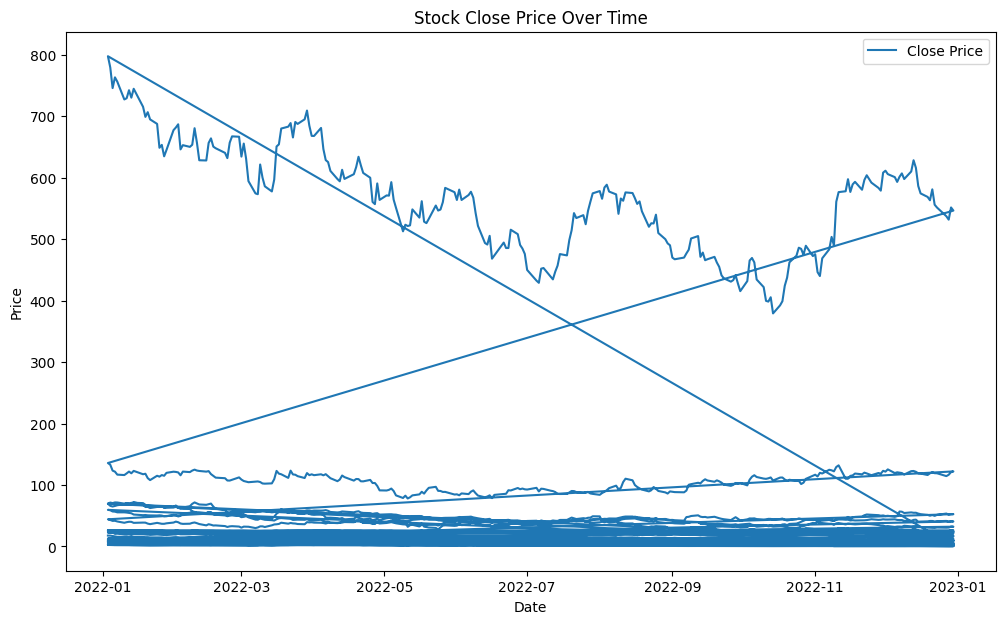

In [59]:
# Visualize trends in stock prices
plt.figure(figsize=(12, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.show()

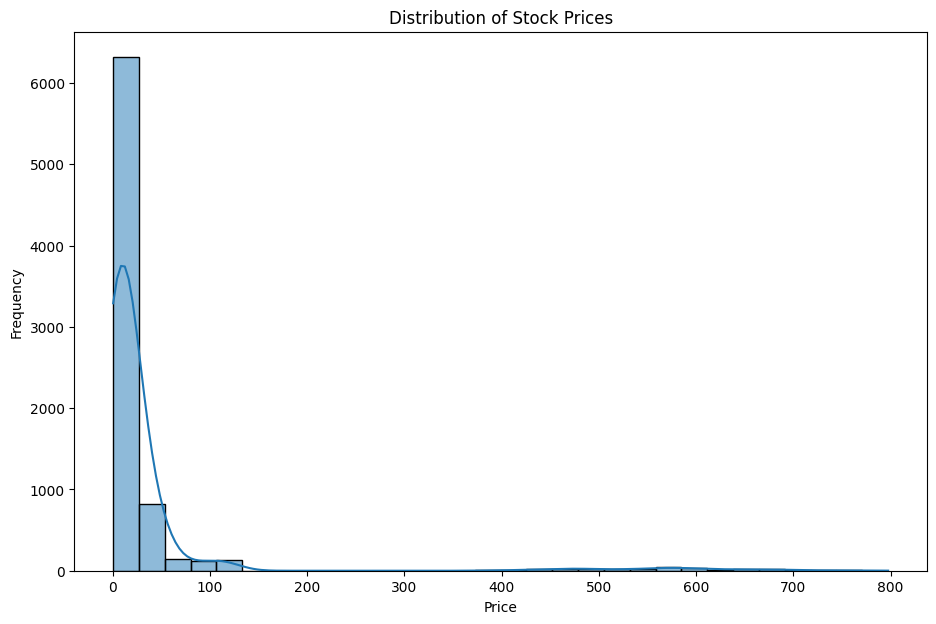

In [57]:
# Visualize stock price distribution
plt.figure(figsize=(11, 7))
sns.histplot(df['close'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Prices')
plt.show()

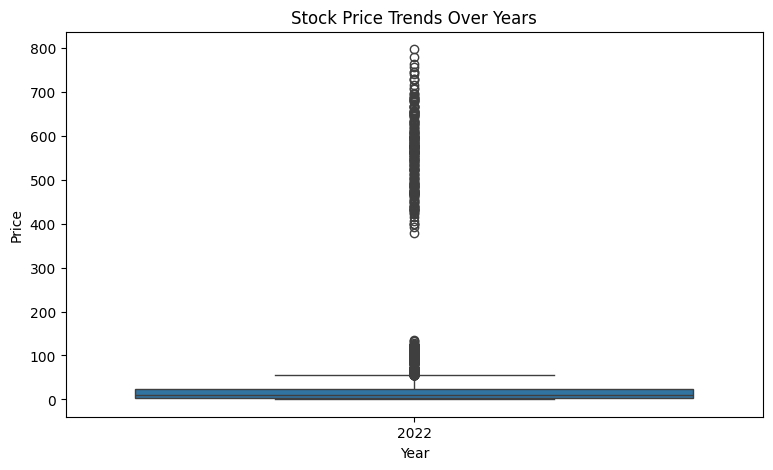

In [56]:
# Visualize stock price trends using a boxplot
df['year'] = df['date'].dt.year
plt.figure(figsize=(9, 5))
sns.boxplot(x=df['year'], y=df['close'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Stock Price Trends Over Years')
plt.show()

2.  Predictive Modeling :

predictive model for stock market prediction using linear regression.

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn import preprocessing



# Select relevant attributes for linear regression
X = df[['open', 'high', 'low', 'close']]

# Fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalize the features
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

y = df['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.1516732001940348


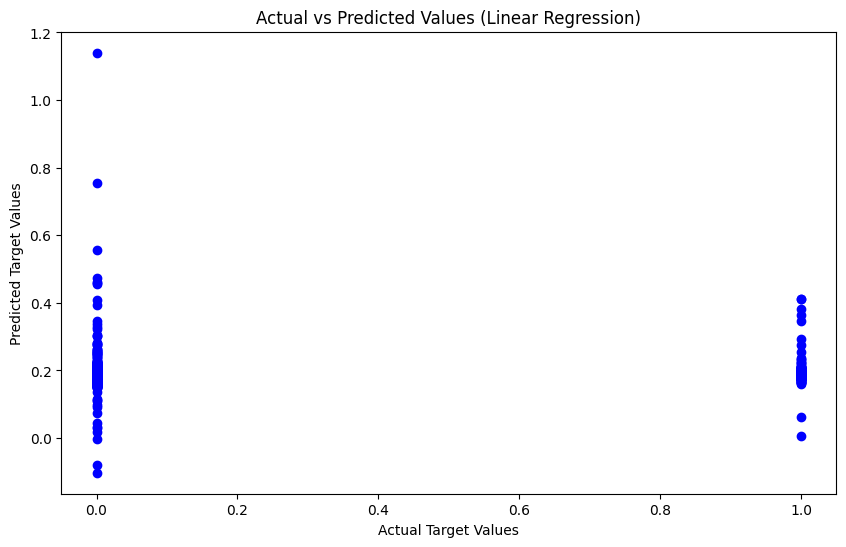

In [121]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()
